In [26]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Partia drugiego wyboru

## List of files

In [2]:
path = 'dane_pdf/analiza_elektoratu/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()
files

['2001_06.csv',
 '2001_07.csv',
 '2004_02.csv',
 '2004_05.csv',
 '2004_06.csv',
 '2004_08.csv',
 '2007_02.csv',
 '2007_09.csv',
 '2009_05.csv',
 '2011_06.csv',
 '2011_07.csv',
 '2011_10.csv',
 '2011_11.csv',
 '2013_07.csv',
 '2015_08.csv',
 '2015_09.csv',
 '2017_04.csv']

### List of pandas DF

### Edit DF

In [25]:
if False:
    pd_list = [(lambda x: pd.read_csv(path+x,index_col=0, header=0).T)(f) for f in files]
    
    val = 100
    for pi, pl in enumerate(pd_list):
        pl.index = [ind.replace('*','').replace('\r','').replace('\n','').replace('- ','').replace('+ ','+').replace(' +','+')  for ind in pl.index]
        pl.columns = [ind.replace('*','').replace('\r','').replace('\n','').replace('+ ','+').replace(' +','+') for ind in pl.columns]

        pl[pl == '-'] = 0
        pl = pl.fillna(0)
        f = 0
        rows = pl.index.values.tolist()
        cols = pl.columns.values.tolist()
        for r_org in rows:
            for c in cols:
                #val = pl.loc[r_org,:].astype(str).astype(int).nlargest(2)[1] * 1.5
                #val = int(val)
                r = r_org
                r2 = 'error'

                c_split = c.split(' ')
                c_computed = ''
                if '(' in r:
                    r, r2 = r.split('(')[:2]
                    r = r.lstrip()
                    r2 = r2.lstrip().replace(')','').rstrip()
                elif r_org[-len('Kukiza'):] == 'Kukiza': r = "KUKIZ"

                if len(c_split) >= len(r):
                    for ri in range(len(r)):
                        c_computed = c_computed + c_split[ri][0]
                if c == 'Platforma Obywatelska RP': c_computed = 'PO RP'
                elif c[:len('Prawo i Sprawiedliwość')] == 'Prawo i Sprawiedliwość': c_computed = 'PiS'

                if 'SLD+TR+PPS+UP+Zieloni' in r_org and 'SLD+TR+PPS+UP+Zieloni' in c: r2 = 'SLD+TR+PPS+UP+Zieloni'
                elif 'Prawo i Sprawiedliwość' in c and 'PiS' in r_org: r2 = 'Prawo i Sprawiedliwość'

                if ((r in c+c_computed) or (r_org in c_computed+c) or (r2 in c_computed+c)):
                    if r_org in rows: 
                        pl.loc[r_org,c] = val
                        #del pl[c]
                    elif r in rows: 
                        pl.loc[r,c] = val
                        #del pl[c]
                    f += 1

        print(pi,f,pl.index.shape, end = ' ')
        if np.abs(f - pl.index.shape[0]) > 1: print('WRONG', end = '\n')
        else: print()

        pd_list[pi] = pl
        #added no main
        pl.to_csv(path+'clean/no_main_'+files[pi])
else:
    pd_list = [(lambda x: pd.read_csv(path+'clean/'+x,index_col=0, header=0))(f) for f in files]

In [26]:
embedding = MDS(n_components=2)
no = 0
MDS_parties = embedding.fit_transform(pd_list[no].T.iloc[0:-3,:].dropna())

In [27]:
mm = ['^','^','x' ,'x','o','o', 'v','v','v' ,'s','s' ,'d','d']
mark = ['x','o','v']
mm = mm[:MDS_parties.shape[0]]

In [28]:
files[no]

'2001_06.csv'

In [29]:
pd_list[no]

,AWSP,ChD III RP,PiS,LR,PO,PPS,PSL,PUG,PdP,RKN,„Samoobrona”,SLD+UP+KPEiR,UW,Inna,Nie ma takiej partii,Trudno powiedzieć
AWSP,100,6,13,0,26,0,6,0,0,0,0,7,8,0,12,22
PiS,11,4,100,4,26,0,9,0,3,4,3,9,2,3,14,8
PO,17,4,19,0,100,2,10,1,0,0,3,10,18,0,10,6
PSL,3,0,7,1,12,0,100,0,4,0,5,49,0,0,10,8
SLD+UP+KPEiR,1,0,6,0,21,2,22,1,0,0,2,100,9,0,26,10


In [30]:
parties_np = pd_list[no].iloc[:,:-3].T.to_numpy()
parties_np

array([[100,  11,  17,   3,   1],
       [  6,   4,   4,   0,   0],
       [ 13, 100,  19,   7,   6],
       [  0,   4,   0,   1,   0],
       [ 26,  26, 100,  12,  21],
       [  0,   0,   2,   0,   2],
       [  6,   9,  10, 100,  22],
       [  0,   0,   1,   0,   1],
       [  0,   3,   0,   4,   0],
       [  0,   4,   0,   0,   0],
       [  0,   3,   3,   5,   2],
       [  7,   9,  10,  49, 100],
       [  8,   2,  18,   0,   9]])

In [31]:
init_parties = MDS_parties[[2,4],:]
init_parties = np.append(init_parties, [(np.random.rand(2)-0.5)*40], axis = 0 )
init_parties

array([[  3.72715835, -81.99853488],
       [ 60.06130018, -63.98380022],
       [-11.13079343,  13.52719868]])

In [32]:
parties_Kmeans = KMeans(n_clusters=3 )#, init = init_parties)
parties_Kmeans = parties_Kmeans.fit(parties_np)#MDS_parties)
parties_Kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
parties_Kmeans.labels_

array([0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0], dtype=int32)

[]

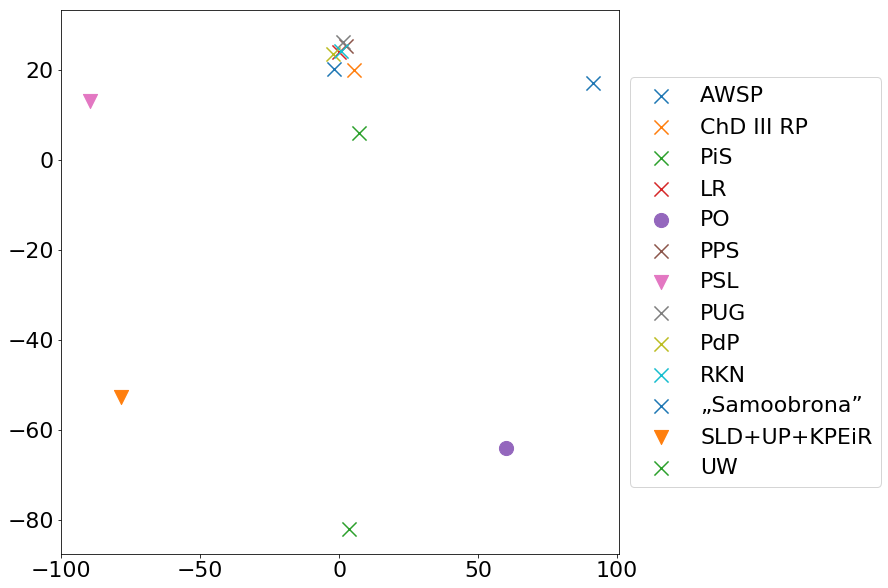

In [34]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 22})
for i,m in enumerate(mm):
    m = mark[parties_Kmeans.labels_[i]]
    plt.scatter(MDS_parties[i,0],MDS_parties[i,1], marker=m, s = 200)
plt.legend(pd_list[no].T.index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

In [35]:
pd_list[no]

,AWSP,ChD III RP,PiS,LR,PO,PPS,PSL,PUG,PdP,RKN,„Samoobrona”,SLD+UP+KPEiR,UW,Inna,Nie ma takiej partii,Trudno powiedzieć
AWSP,100,6,13,0,26,0,6,0,0,0,0,7,8,0,12,22
PiS,11,4,100,4,26,0,9,0,3,4,3,9,2,3,14,8
PO,17,4,19,0,100,2,10,1,0,0,3,10,18,0,10,6
PSL,3,0,7,1,12,0,100,0,4,0,5,49,0,0,10,8
SLD+UP+KPEiR,1,0,6,0,21,2,22,1,0,0,2,100,9,0,26,10


In [36]:
embedding = MDS(n_components=2)
MDS_parties = embedding.fit_transform(pd_list[16].iloc[:,0:-3])
mm = ['^','x','o', 'v' ,'s','d']
print(MDS_parties.shape[0])
print(len(mm))

6
6


[]

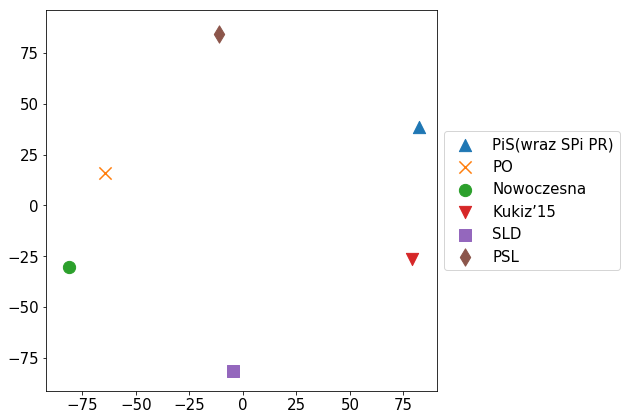

In [37]:
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
for i,m in enumerate(mm):
    plt.scatter(MDS_parties[i,0],MDS_parties[i,1], marker=m, s = 150)
plt.legend(pd_list[16].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

In [38]:
pd_list[5]

,ChD III RP,KPEiR,LPR,PD - demokraci.pl,PO,PSL,PiS,Samoobrona,SdPl,SLD,UPR,Inne/pozostałe,"Nie ma takiej partii, trudno powiedzieć",Ogółem
LPR,3,8,100,0,4,3,28,17,0,0,0,18,19,100
PO,0,0,4,9,100,5,45,3,6,3,5,2,18,100
PSL,0,7,14,6,0,100,14,13,0,0,0,22,24,100
PiS,2,1,21,0,37,3,100,8,0,1,2,2,23,100
Samoobrona,0,4,12,0,6,13,18,100,0,4,5,2,36,100
SdPl,0,4,0,18,30,0,0,0,100,21,6,3,18,100
SLD,0,6,0,2,11,9,10,6,26,100,0,10,20,100


2004_08.csv


[]

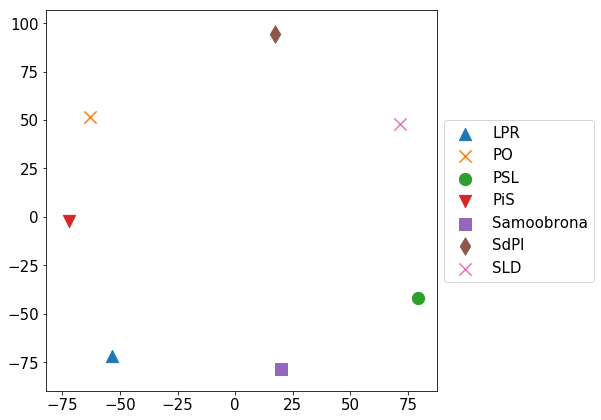

In [39]:
embedding = MDS(n_components=2)
MDS_parties = embedding.fit_transform(pd_list[5].iloc[:,0:-3])
mm = ['^','x','o', 'v' ,'s','d','x']
print(files[5])
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
for i,m in enumerate(mm):
    plt.scatter(MDS_parties[i,0],MDS_parties[i,1], marker=m, s = 150)
plt.legend(pd_list[5].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

2004_06.csv


[]

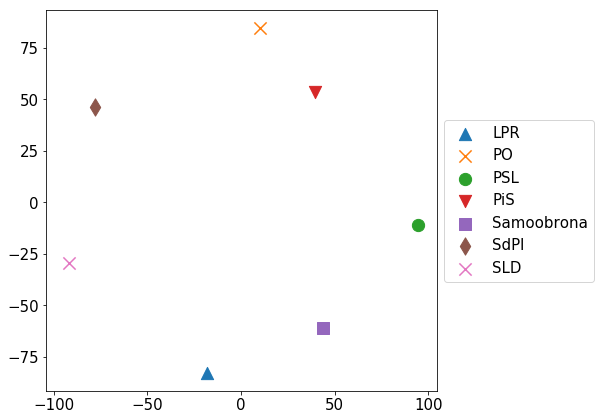

In [40]:
embedding = MDS(n_components=2)
MDS_parties = embedding.fit_transform(pd_list[4].iloc[:,0:-3])
mm = ['^','x','o', 'v' ,'s','d','x']
print(files[4])
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
for i,m in enumerate(mm):
    plt.scatter(MDS_parties[i,0],MDS_parties[i,1], marker=m, s = 150)
plt.legend(pd_list[4].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

# Opinie elektoratu

In [2]:
path = 'dane_pdf/charaktetyryka_pogladow/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()
files

['2005_percent.csv',
 '2005_points.csv',
 '2007_percent.csv',
 '2007_points.csv',
 '2011_percent.csv',
 '2011_points.csv',
 '2015_percent.csv',
 '2015_points.csv',
 '2019_percent.csv',
 '2019_points.csv']

In [3]:
op_list = [(lambda x: pd.read_csv(path+f,index_col=0, header=0).T)(f) for f in files]

In [4]:
inx = 1
op_list[inx]

Pary przeciwstawnych stwierdzeń,(1) Polska powinna dążyć do jaknajściślejszej integracji w ramachUnii Europejskiej,(1) Należy prywatyzować powolii tylko niektóre przedsiębiorstwapaństwowe,(1) Państwo powinno zapewnićobywatelom wysoki poziomświadczeń społecznych. takichjak opieka zdrowotna.szkolnictwo itp.,(1) Osoby dużo zarabiającepowinny płacić wyższy procentpodatku od swoich dochodówniż ci. którzy zarabiają mało,(1) Bezrobocie jest zawszezjawiskiem szkodliwym i należyje bezwzględnie zwalczać,(1) Z przestępczością należywalczyć twardo. nawet jeślimiałoby to ograniczać prawai swobody zwykłych obywateli,(1) Osobom zajmującym wysokiestanowiska politycznei gospodarcze w okresie PRLpowinno się obecnie zabronićpełnienia odpowiedzialnychfunkcji państwowych,(1) Kościół powinien byćod państwa oddzielony i niepowinien zajmować się polityką,(1) Przerywanie ciąży powinnobyć dozwolone bez żadnychograniczeń
KPEiR,5.12,1.54,1.44,2.21,1.73,2.96,3.33,2.43,4.98
LPR,4.70,1.85,1.72,1.79,2.55,3.95,2.47,2.92,5.63
PD,3.36,2.98,2.66,3.76,3.66,4.17,4.02,2.03,4.37
PO,3.77,2.61,2.30,3.07,3.13,3.95,3.06,1.97,4.52
PSL,4.05,1.76,1.52,1.68,2.13,3.45,3.50,2.07,5.33
PiS,4.63,2.36,1.94,2.54,2.69,3.90,2.66,2.26,4.82
Samoobrona,4.53,1.87,1.57,1.97,2.03,3.45,3.26,1.77,4.78
SdPl,3.58,2.41,1.91,2.75,3.35,3.80,4.34,1.47,3.45
SLD,4.33,2.00,2.10,2.76,2.53,4.29,4.58,1.43,3.45
UP,3.85,1.91,1.96,1.99,2.41,4.28,3.28,2.06,4.50


In [13]:
years = ['2005','2007','2011','2015','2019']

Variance ratio: [0.62930625 0.21650729 0.06272309]
Variance ratio: [0.87599901 0.10093487 0.02306612]
Variance ratio: [0.79888724 0.16355621 0.03755655]
Variance ratio: [0.53071788 0.36459499 0.08359125]
Variance ratio: [0.8621703  0.10061165 0.02352837]


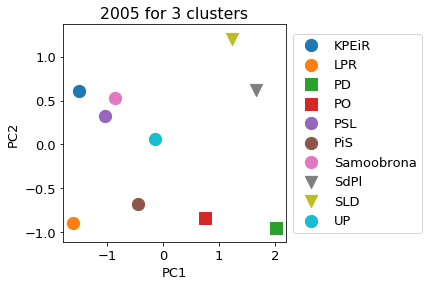

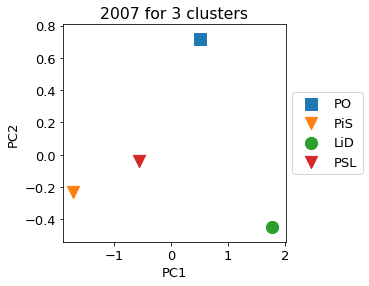

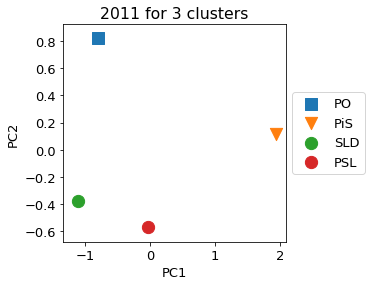

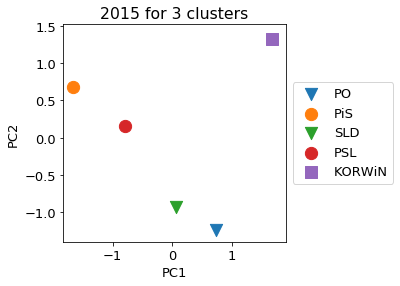

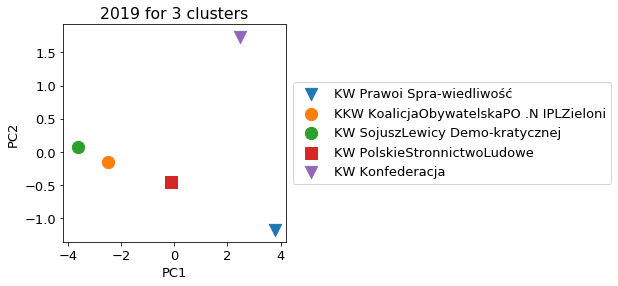

In [41]:
for inx in np.arange(1,len(op_list),2):
    pca = PCA(n_components=3)
    pca.fit(op_list[inx])
    
    X_pca=pca.transform(op_list[inx]) 
    print('Variance ratio:', pca.explained_variance_ratio_)
    
    parties_Kmeans = KMeans(n_clusters=3)
    parties_Kmeans = parties_Kmeans.fit(op_list[inx])
    
    embedding = MDS(n_components=2)
    MDS_parties = embedding.fit_transform(op_list[inx])
    
    mm = ['o', 'v' ,'s']
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 13})
    
    for i in range(op_list[inx].shape[0]):
        m = mm[parties_Kmeans.labels_[i]]
        #plt.scatter(MDS_parties[i,1],MDS_parties[i,1], marker=m, s = 150)
        plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, s = 150)
    
    plt.title(years[inx//2]+' for 3 clusters')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(op_list[inx].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()

Variance ratio: [0.62930625 0.21650729 0.06272309]
Variance ratio: [0.87599901 0.10093487 0.02306612]
Variance ratio: [0.79888724 0.16355621 0.03755655]
Variance ratio: [0.53071788 0.36459499 0.08359125]
Variance ratio: [0.8621703  0.10061165 0.02352837]


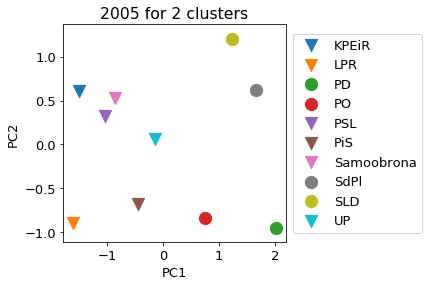

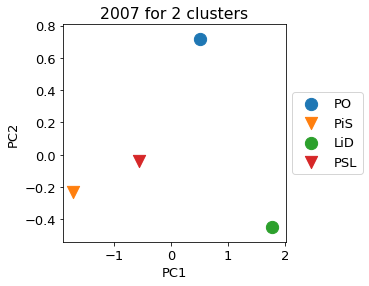

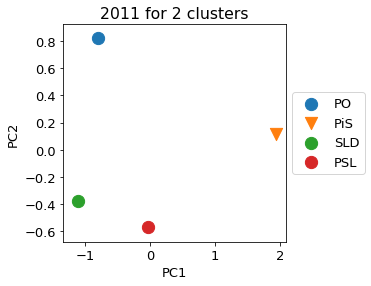

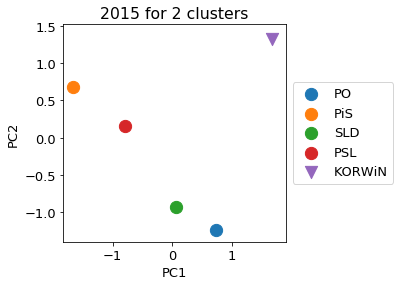

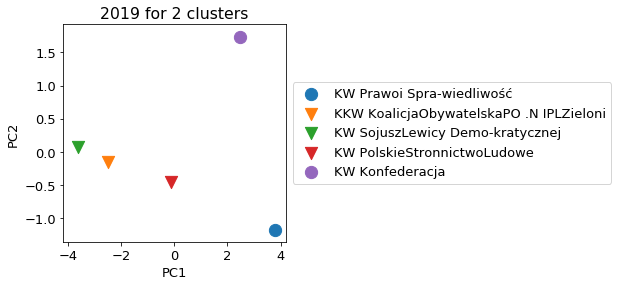

In [40]:
for inx in np.arange(1,len(op_list),2):
    pca = PCA(n_components=3)
    pca.fit(op_list[inx])
    
    X_pca=pca.transform(op_list[inx]) 
    print('Variance ratio:', pca.explained_variance_ratio_)
    
    parties_Kmeans = KMeans(n_clusters=2)
    parties_Kmeans = parties_Kmeans.fit(op_list[inx])
    
    embedding = MDS(n_components=2)
    MDS_parties = embedding.fit_transform(op_list[inx])
    
    mm = ['o', 'v' ,'s']
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 13})
    
    for i in range(op_list[inx].shape[0]):
        m = mm[parties_Kmeans.labels_[i]]
        #plt.scatter(MDS_parties[i,1],MDS_parties[i,1], marker=m, s = 150)
        plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, s = 150)
    
    plt.title(years[inx//2]+' for 2 clusters')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(op_list[inx].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()